# import package

In [72]:
import torch
from tqdm import tqdm

# define inputs and labels

In [73]:
inputs = torch.tensor([[1., 1.], [1., -1.], [-1., 1.], [-1., -1.]])
labels = torch.tensor([[0.], [1.], [1.], [0.]])

# define the model

## I think that in the question, "threshold" refers to the "negative bias" parameter in the neural network model.

In [74]:
import torch.nn as nn
class XORModel(nn.Module):
    def __init__(self, model_type):
        super(XORModel, self).__init__()
        self.model = model_type
        self.activation = nn.Sigmoid()

        if model_type == "model1":
            self.hidden = nn.Linear(2, 2, bias=True)
            self.output = nn.Linear(2, 1, bias=True)
            # 初始化權重和偏差 
            self.hidden.weight.data = torch.tensor([[0.2, -0.4], [0.2, -0.2]], dtype=torch.float32)
            self.hidden.bias.data = torch.tensor([-0.8, 0.1], dtype=torch.float32)
            self.output.weight.data = torch.tensor([[0.1, -0.4]], dtype=torch.float32)
            self.output.bias.data = torch.tensor([-0.3], dtype=torch.float32)
        elif model_type == "model2":
            self.hidden = nn.Linear(2, 1, bias=True)
            self.output = nn.Linear(3, 1, bias=True)
            # 初始化權重和偏差 
            self.hidden.weight.data = torch.tensor([[0.2, -0.4]], dtype=torch.float32)
            self.hidden.bias.data = torch.tensor([-0.8], dtype=torch.float32)
            self.output.weight.data = torch.tensor([[0.2, -0.2, -0.4]], dtype=torch.float32)
            self.output.bias.data = torch.tensor([-0.3], dtype=torch.float32)
        else:
            raise ValueError("Invalid model type")

    def forward(self, x):
        if self.model == "model1":
            x = self.activation(self.hidden(x))
            x = self.output(x)
            x = self.activation(x)
        elif self.model == "model2":
            hidden = self.activation(self.hidden(x))
            combined = torch.cat((x, hidden), 1)
            output = self.output(combined)
            x = self.activation(output)
        return x


# Set hyperparameter and Train

In [75]:
# hyperparameter
epochs = 40000
epoch_step = 1000
loss_data = {} # To record the loss per epoch_step
model_trained ={}


In [76]:
for i in range(1, 3):
    model_label = "model" + str(i)
    print(f"Train model is {model_label}")
    model = XORModel(model_type=model_label)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    loss_TS = []

    epoch = 0
    while epoch != epochs:
        for i in tqdm(range(epoch_step)):
            optimizer.zero_grad() # clear grade
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch += 1
        print(f"Loss: {loss.item()}")
        loss_TS.append(loss.item())
    loss_data[model_label] = loss_TS
    model_trained[model_label] = model
        



Train model is model1


100%|██████████| 1000/1000 [00:00<00:00, 11257.34it/s]


Loss: 0.2480790615081787


100%|██████████| 1000/1000 [00:00<00:00, 11262.54it/s]


Loss: 0.23133485019207


100%|██████████| 1000/1000 [00:00<00:00, 11492.03it/s]


Loss: 0.15014857053756714


100%|██████████| 1000/1000 [00:00<00:00, 11401.75it/s]


Loss: 0.04796469956636429


100%|██████████| 1000/1000 [00:00<00:00, 11592.46it/s]


Loss: 0.021392550319433212


100%|██████████| 1000/1000 [00:00<00:00, 9937.39it/s]


Loss: 0.012921692803502083


100%|██████████| 1000/1000 [00:00<00:00, 8202.91it/s]


Loss: 0.009053869172930717


100%|██████████| 1000/1000 [00:00<00:00, 10001.20it/s]


Loss: 0.006896172184497118


100%|██████████| 1000/1000 [00:00<00:00, 10514.33it/s]


Loss: 0.005537028424441814


100%|██████████| 1000/1000 [00:00<00:00, 10324.82it/s]


Loss: 0.004609031602740288


100%|██████████| 1000/1000 [00:00<00:00, 10917.26it/s]


Loss: 0.003938131500035524


100%|██████████| 1000/1000 [00:00<00:00, 11004.74it/s]


Loss: 0.00343204359523952


100%|██████████| 1000/1000 [00:00<00:00, 11156.34it/s]


Loss: 0.003037527669221163


100%|██████████| 1000/1000 [00:00<00:00, 11160.05it/s]


Loss: 0.0027218637987971306


100%|██████████| 1000/1000 [00:00<00:00, 11114.07it/s]


Loss: 0.002463872078806162


100%|██████████| 1000/1000 [00:00<00:00, 11280.20it/s]


Loss: 0.002249276265501976


100%|██████████| 1000/1000 [00:00<00:00, 11440.56it/s]


Loss: 0.002068118192255497


100%|██████████| 1000/1000 [00:00<00:00, 11131.85it/s]


Loss: 0.0019132430898025632


100%|██████████| 1000/1000 [00:00<00:00, 11324.88it/s]


Loss: 0.0017793928273022175


100%|██████████| 1000/1000 [00:00<00:00, 11302.78it/s]


Loss: 0.0016625989228487015


100%|██████████| 1000/1000 [00:00<00:00, 11269.92it/s]


Loss: 0.0015598403988406062


100%|██████████| 1000/1000 [00:00<00:00, 11536.44it/s]


Loss: 0.0014687547227367759


100%|██████████| 1000/1000 [00:00<00:00, 11500.32it/s]


Loss: 0.001387493684887886


100%|██████████| 1000/1000 [00:00<00:00, 11162.49it/s]


Loss: 0.0013145413249731064


100%|██████████| 1000/1000 [00:00<00:00, 11594.87it/s]


Loss: 0.0012487333733588457


100%|██████████| 1000/1000 [00:00<00:00, 11624.56it/s]


Loss: 0.0011890516616404057


100%|██████████| 1000/1000 [00:00<00:00, 11713.84it/s]


Loss: 0.0011347036343067884


100%|██████████| 1000/1000 [00:00<00:00, 11005.99it/s]


Loss: 0.001085008610971272


100%|██████████| 1000/1000 [00:00<00:00, 11573.24it/s]


Loss: 0.0010393933625891805


100%|██████████| 1000/1000 [00:00<00:00, 11504.29it/s]


Loss: 0.000997388269752264


100%|██████████| 1000/1000 [00:00<00:00, 11495.97it/s]


Loss: 0.0009585825609974563


100%|██████████| 1000/1000 [00:00<00:00, 11426.47it/s]


Loss: 0.0009226244874298573


100%|██████████| 1000/1000 [00:00<00:00, 10925.82it/s]


Loss: 0.0008892106125131249


100%|██████████| 1000/1000 [00:00<00:00, 11151.27it/s]


Loss: 0.0008580972789786756


100%|██████████| 1000/1000 [00:00<00:00, 10860.59it/s]


Loss: 0.0008290320402011275


100%|██████████| 1000/1000 [00:00<00:00, 10688.90it/s]


Loss: 0.0008018544176593423


100%|██████████| 1000/1000 [00:00<00:00, 11182.51it/s]


Loss: 0.0007763676694594324


100%|██████████| 1000/1000 [00:00<00:00, 9889.54it/s]


Loss: 0.000752420979551971


100%|██████████| 1000/1000 [00:00<00:00, 10913.32it/s]


Loss: 0.0007298819837160408


100%|██████████| 1000/1000 [00:00<00:00, 11127.16it/s]


Loss: 0.0007086344412527978
Train model is model2


100%|██████████| 1000/1000 [00:00<00:00, 10614.16it/s]


Loss: 0.25003761053085327


100%|██████████| 1000/1000 [00:00<00:00, 10519.21it/s]


Loss: 0.24971970915794373


100%|██████████| 1000/1000 [00:00<00:00, 10793.79it/s]


Loss: 0.24790434539318085


100%|██████████| 1000/1000 [00:00<00:00, 10800.65it/s]


Loss: 0.21592789888381958


100%|██████████| 1000/1000 [00:00<00:00, 10704.56it/s]


Loss: 0.10248169302940369


100%|██████████| 1000/1000 [00:00<00:00, 10757.22it/s]


Loss: 0.049729544669389725


100%|██████████| 1000/1000 [00:00<00:00, 10700.33it/s]


Loss: 0.030169546604156494


100%|██████████| 1000/1000 [00:00<00:00, 10627.67it/s]


Loss: 0.020984746515750885


100%|██████████| 1000/1000 [00:00<00:00, 9552.09it/s]


Loss: 0.01585148461163044


100%|██████████| 1000/1000 [00:00<00:00, 10677.26it/s]


Loss: 0.01263312716037035


100%|██████████| 1000/1000 [00:00<00:00, 10754.07it/s]


Loss: 0.010449182242155075


100%|██████████| 1000/1000 [00:00<00:00, 10435.59it/s]


Loss: 0.008880111388862133


100%|██████████| 1000/1000 [00:00<00:00, 10690.05it/s]


Loss: 0.007703306619077921


100%|██████████| 1000/1000 [00:00<00:00, 10734.09it/s]


Loss: 0.006790759973227978


100%|██████████| 1000/1000 [00:00<00:00, 10737.09it/s]


Loss: 0.006064065732061863


100%|██████████| 1000/1000 [00:00<00:00, 10395.78it/s]


Loss: 0.005472662393003702


100%|██████████| 1000/1000 [00:00<00:00, 10716.73it/s]


Loss: 0.004982637241482735


100%|██████████| 1000/1000 [00:00<00:00, 10793.65it/s]


Loss: 0.004570391960442066


100%|██████████| 1000/1000 [00:00<00:00, 9987.22it/s]


Loss: 0.004219057969748974


100%|██████████| 1000/1000 [00:00<00:00, 10748.07it/s]


Loss: 0.003916310146450996


100%|██████████| 1000/1000 [00:00<00:00, 10792.15it/s]


Loss: 0.00365283340215683


100%|██████████| 1000/1000 [00:00<00:00, 10774.46it/s]


Loss: 0.0034215738996863365


100%|██████████| 1000/1000 [00:00<00:00, 10598.93it/s]


Loss: 0.003217045683413744


100%|██████████| 1000/1000 [00:00<00:00, 10432.35it/s]


Loss: 0.0030349434819072485


100%|██████████| 1000/1000 [00:00<00:00, 10146.95it/s]


Loss: 0.0028718081302940845


100%|██████████| 1000/1000 [00:00<00:00, 10366.88it/s]


Loss: 0.0027248673141002655


100%|██████████| 1000/1000 [00:00<00:00, 10582.11it/s]


Loss: 0.0025918586179614067


100%|██████████| 1000/1000 [00:00<00:00, 9778.05it/s]


Loss: 0.002470907522365451


100%|██████████| 1000/1000 [00:00<00:00, 8986.34it/s]


Loss: 0.0023604664020240307


100%|██████████| 1000/1000 [00:00<00:00, 10043.98it/s]


Loss: 0.0022592616733163595


100%|██████████| 1000/1000 [00:00<00:00, 10028.27it/s]


Loss: 0.002166144549846649


100%|██████████| 1000/1000 [00:00<00:00, 10030.19it/s]


Loss: 0.002080247038975358


100%|██████████| 1000/1000 [00:00<00:00, 9603.75it/s]


Loss: 0.0020007307175546885


100%|██████████| 1000/1000 [00:00<00:00, 9560.30it/s]


Loss: 0.0019269479671493173


100%|██████████| 1000/1000 [00:00<00:00, 9930.59it/s]


Loss: 0.0018582998309284449


100%|██████████| 1000/1000 [00:00<00:00, 9878.08it/s]


Loss: 0.0017942534759640694


100%|██████████| 1000/1000 [00:00<00:00, 10352.83it/s]


Loss: 0.0017344107618555427


100%|██████████| 1000/1000 [00:00<00:00, 10418.09it/s]


Loss: 0.0016783357132226229


100%|██████████| 1000/1000 [00:00<00:00, 9083.63it/s]


Loss: 0.0016256754752248526


100%|██████████| 1000/1000 [00:00<00:00, 10404.97it/s]

Loss: 0.0015761940740048885


# plot the Loss trend per epoch

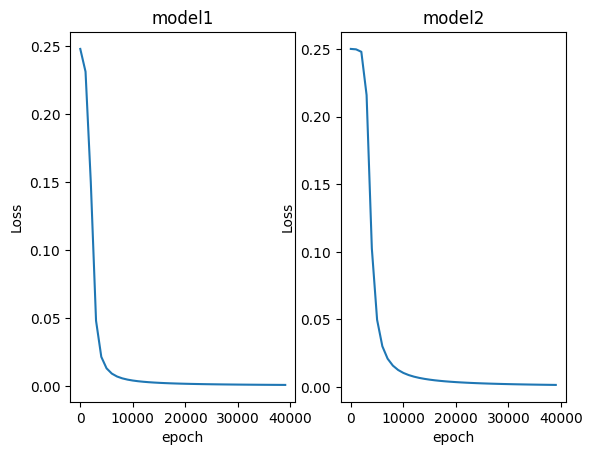

In [77]:
# plot: epoch-loss
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2)
for index, key in enumerate(loss_data):
    ax[index].plot(range(0, epochs, epoch_step), loss_data[key])
    ax[index].set_title(key)
    ax[index].set_xlabel("epoch")
    ax[index].set_ylabel("Loss")
plt.show()

# Test

In [78]:
for key in model_trained:
    print(f"model type: {key}")  
    model = model_trained["model1"].eval() # 切換至測試模式
    test_inputs = torch.tensor([[1., 1.], [1., -1.], [-1., 1.], [-1., -1.]])
    test_labels = torch.tensor([[0.], [1.], [1.], [0.]])
    with torch.no_grad():
        test_outputs = model(test_inputs)
        test_loss = criterion(test_outputs, test_labels)
        print(f'Test loss:{test_loss.item():.6f}')
        # 顯示每個輸入對應的預測值和實際值
        for i in range(len(test_inputs)):
            print('Input:', test_inputs[i], f'Predicted: {test_outputs[i].item():.6f}', 'Actual:', test_labels[i].item())
    print("-"*20)


model type: model1
Test loss:0.000709
Input: tensor([1., 1.]) Predicted: 0.025141 Actual: 0.0
Input: tensor([ 1., -1.]) Predicted: 0.975078 Actual: 1.0
Input: tensor([-1.,  1.]) Predicted: 0.969191 Actual: 1.0
Input: tensor([-1., -1.]) Predicted: 0.025141 Actual: 0.0
--------------------
model type: model2
Test loss:0.000709
Input: tensor([1., 1.]) Predicted: 0.025141 Actual: 0.0
Input: tensor([ 1., -1.]) Predicted: 0.975078 Actual: 1.0
Input: tensor([-1.,  1.]) Predicted: 0.969191 Actual: 1.0
Input: tensor([-1., -1.]) Predicted: 0.025141 Actual: 0.0
--------------------
